# A) Visualisation et Prétraitement des données 



In [30]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"

data = pd.read_csv(file_path)


# Données Brutes sous format Tableau 

In [12]:

import pandas as pd
# Renommer les colonnes en tenant compte de leur nombre
data.columns = ['Temps', 'X', 'Y', 'Z']  # Ajoutez un nom pour chaque colonne présente

# Convertir la colonne 'Temps' en datetime 
data['Temps'] = pd.to_datetime(data['Temps'])

# Calculer le temps écoulé en secondes entre chaque ligne
data['Temps écoulé (s)'] = data['Temps'].diff().dt.total_seconds().fillna(0)

# Créer une nouvelle colonne pour le temps cumulé croissant
data['Temps cumulé (s)'] = data['Temps écoulé (s)'].cumsum()

# Afficher les premières lignes pour vérifier
data.head()



,Temps,X,Y,Z,Temps écoulé (s),Temps cumulé (s)
0,2024-10-06 15:39:03.100,0.234375,-0.703125,0.093750,0.000,0.000
1,2024-10-06 15:39:03.102,0.281250,-0.765625,0.093750,0.002,0.002
2,2024-10-06 15:39:03.105,0.281250,-0.765625,0.109375,0.003,0.005
3,2024-10-06 15:39:03.107,0.234375,-0.781250,0.109375,0.002,0.007
4,2024-10-06 15:39:03.110,0.234375,-0.781250,0.093750,0.003,0.010


## Données Brutes au cours du temps (s)

## Prétraitement des données : Application d'un filtre passe bas  de butterworth :

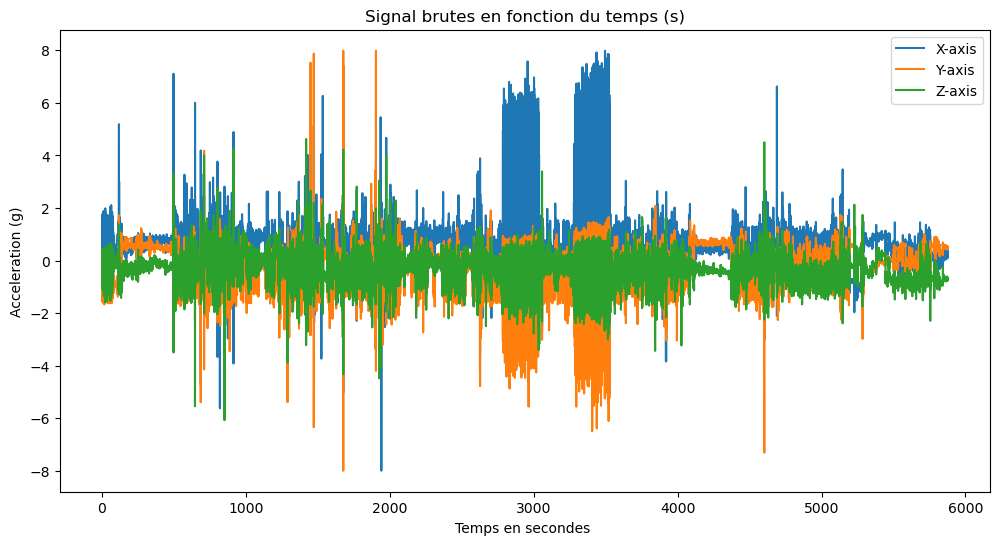

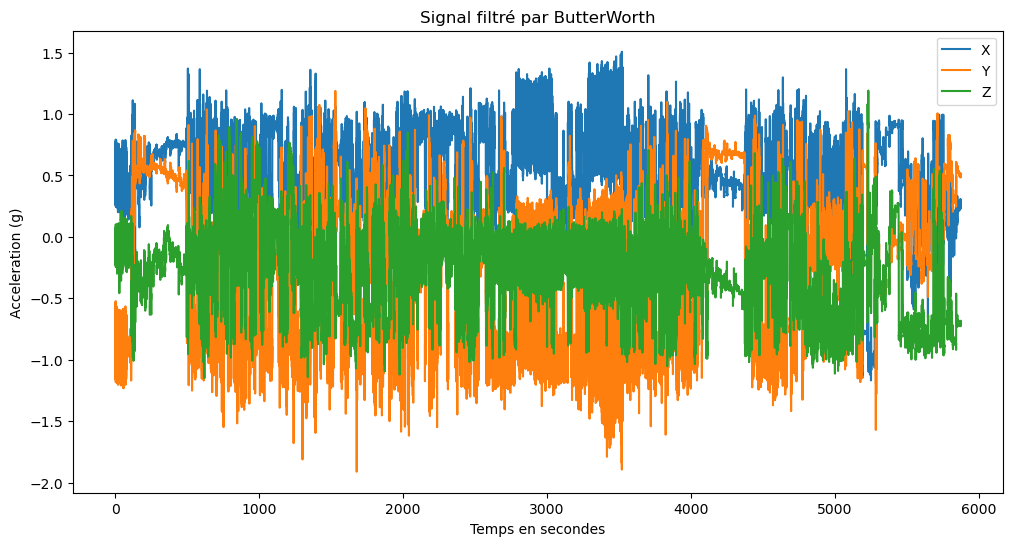

In [13]:
# Import des librairies 
import pandas as pd
import matplotlib.pyplot as plt

#Chemin d'accès 
file_path = r"/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:]   # Sélectionner uniquement les colonnes 1, 2 et 3 pour le signal (X, Y, Z)


data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce') 

# Calcul l'interval d'échnatillonage 
sampling_interval = (
    pd.to_datetime(data[timestamp_column].iloc[1]) -  # Access a single row
    pd.to_datetime(data[timestamp_column].iloc[0])
).total_seconds()

#Créer une nouvelle colonne pour le temps relatif en secondes, en utilisant l'index des données et l'intervalle d'échantillonnage
data['relative_time_seconds'] = data.index * sampling_interval

# Légende
axis_labels = ['X-axis', 'Y-axis', 'Z-axis']
colors = {'X': '#1f77b4', 'Y': '#ff7f0e', 'Z': '#2ca02c'}  # Define colors for each signal

#Le signal est tracé avec le libellé et la couleur appropriés pour chaque axe en utilisant une boucle
plt.figure(figsize=(12, 6))
for signal, axis_label, color in zip(signal_columns, axis_labels, colors.values()):
    plt.plot(data['relative_time_seconds'], data[signal], label=axis_label, color=color)

# Graphe donées brutes
plt.title("Signal brutes en fonction du temps (s)")
plt.xlabel("Temps en secondes ")
plt.ylabel("Acceleration (g)")
plt.legend() # Display the legend
plt.show()

# Appliquer un filtre passe bas avec une fonction 
from scipy.signal import butter, filtfilt

# Fonction filtre passe bas 
def lowpass_filter(data, cutoff, fs, order=4):
    """
    Apply a low-pass Butterworth filter.
    
    Parameters:
        data (array-like): The signal to filter.
        cutoff (float): The cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The order of the filter (default is 4).
    
    Returns:
        array-like: The filtered signal.
    """
    # Calcule de la fréquence de nquist 
    nyquist = 0.5 * fs  
    normal_cutoff = cutoff / nyquist
    # Creation des coefficients du filtre de Butterworth.
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
     # Appliquer le filtre à la data. 
    return filtfilt(b, a, data)

# Definition de la fréquence d'échantillonage et fréquence de coupure pour le filtre.
fs = 1 / (sampling_interval)  # Fréquence d'échnatillonage en Hz
cutoff = 2  # Fréquence de coupure du filtre en Hz
axis_labels = ['X', 'Y', 'Z']  # Légendes

for signal in signal_columns: 
    data[signal] = lowpass_filter(data[signal], cutoff, fs) # Filter the signal 

# Tracer le signal filtré 
plt.figure(figsize=(12, 6))
for signal, axis_label in zip(signal_columns, axis_labels):  
    plt.plot(data['relative_time_seconds'], data[signal], label=axis_label)  

# Graphe du signal filtré 
plt.title("Signal filtré par ButterWorth") # Titre
plt.xlabel("Temps en secondes")
plt.ylabel("Acceleration (g)")
plt.legend()  
plt.show()

Ce filtre permet de : 

`Réduire le bruit` : Suppression des fluctuations parasites pour obtenir un signal plus propre.

`Lisser le signal ` : Simplifie le signal pour mettre en évidence les variations principales.

`Éliminer les artefacts` : Réduction des valeurs extrêmes dues à des erreurs de mesure.

`Mettre en évidence les mouvements significatifs` : Les tendances réelles sont plus faciles à repérer.

`Améliorer la lisibilité` : Facilite l'interprétation visuelle et l'analyse des données.


# Zoom sur un échantillons de data

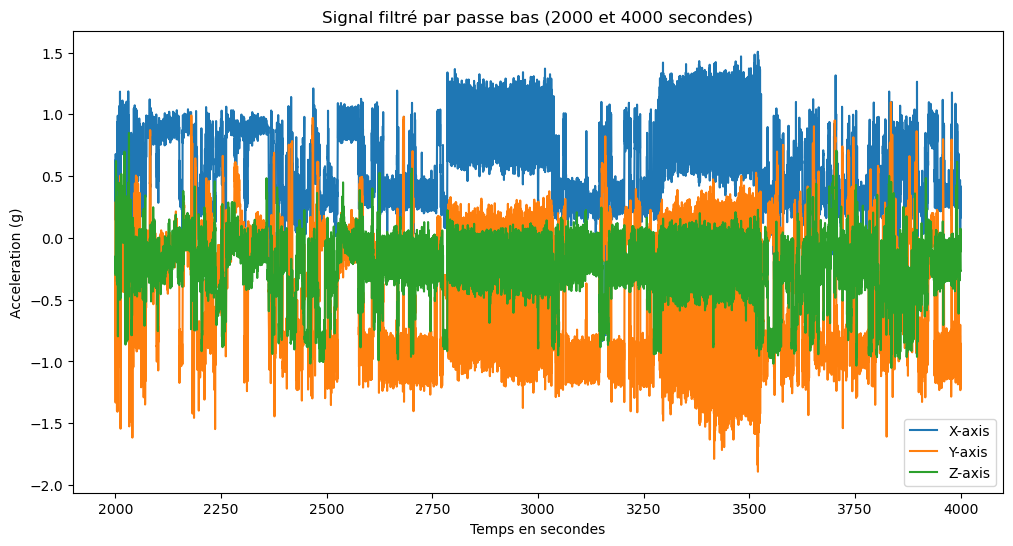

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Charger les données
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:4]  # Sélectionner uniquement les colonnes 1, 2 et 3 pour le signal (X, Y, Z)

# Convertir la colonne de timestamps en datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')

# Supprimer les lignes avec des timestamps non valides
data = data.dropna(subset=[timestamp_column])

# Renommer les colonnes pour une meilleure clarté
data.columns = ['Temps', 'X', 'Y', 'Z']

# Calculer l'intervalle d'échantillonnage en secondes si possible
if len(data) > 1:
    sampling_interval = (
        data['Temps'].iloc[1] - data['Temps'].iloc[0]
    ).total_seconds()
else:
    raise ValueError("Le fichier contient moins de deux entrées valides pour calculer l'intervalle d'échantillonnage.")

# Créer une colonne pour le temps relatif en secondes
data['relative_time_seconds'] = data.index * sampling_interval

# Fonction pour appliquer un filtre passe-bas
def lowpass_filter(signal, cutoff, fs, order=4):
    """
    Applique un filtre passe-bas Butterworth.
    
    Parameters:
        signal (array-like): Le signal à filtrer.
        cutoff (float): La fréquence de coupure (Hz).
        fs (float): La fréquence d'échantillonnage (Hz).
        order (int): L'ordre du filtre (par défaut 4).
    
    Returns:
        array-like: Le signal filtré.
    """
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Fréquence d'échantillonnage (fs) et fréquence de coupure pour le filtre passe-bas
fs = 1 / sampling_interval  # Fréquence d'échantillonnage en Hz
cutoff = 2  # Fréquence de coupure (en Hz)

# Appliquer le filtre passe-bas sur chaque axe (X, Y, Z)
data_filtered = data[(data['relative_time_seconds'] >= 2000) & (data['relative_time_seconds'] <= 4000)].copy()
for axis in ['X', 'Y', 'Z']:
    data_filtered[axis] = lowpass_filter(data_filtered[axis], cutoff, fs)

# Tracer le signal filtré
plt.figure(figsize=(12, 6))
axis_labels = ['X-axis', 'Y-axis', 'Z-axis']
colors = {'X': '#1f77b4', 'Y': '#ff7f0e', 'Z': '#2ca02c'}

for signal, axis_label, color in zip(['X', 'Y', 'Z'], axis_labels, colors.values()):
    plt.plot(data_filtered['relative_time_seconds'], data_filtered[signal], label=axis_label, color=color)

plt.title("Signal filtré par passe bas (2000 et 4000 secondes)")
plt.xlabel("Temps en secondes")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.show()


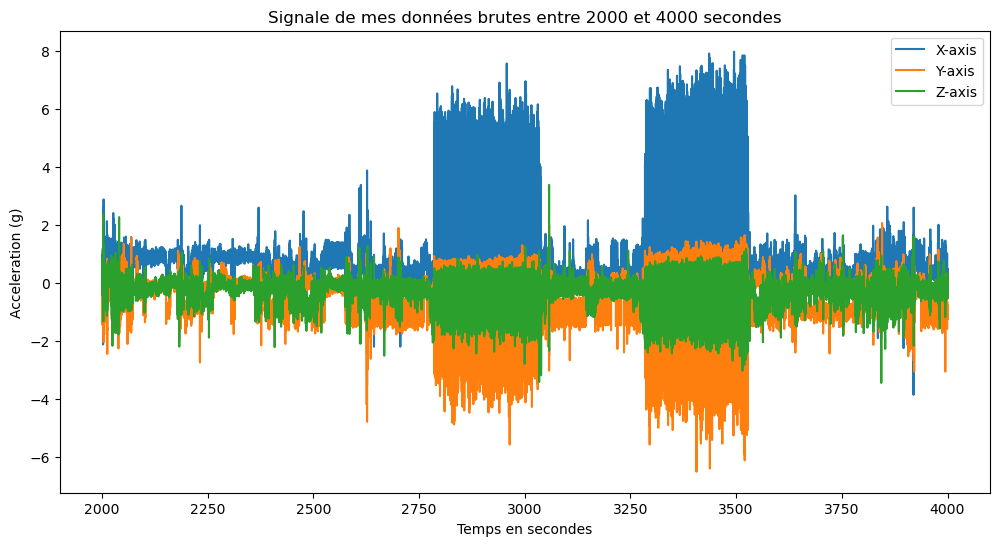

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:4]  # Sélectionner uniquement les colonnes 1, 2 et 3 pour le signal (X, Y, Z)

# Convertir la colonne de timestamps en datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')

# Supprimer les lignes avec des timestamps non valides
data = data.dropna(subset=[timestamp_column])

# Renommer les colonnes pour une meilleure clarté
data.columns = ['Temps', 'X', 'Y', 'Z']

# Calculer l'intervalle d'échantillonnage en secondes si possible
if len(data) > 1:
    sampling_interval = (
        data['Temps'].iloc[1] - data['Temps'].iloc[0]
    ).total_seconds()
else:
    raise ValueError("Le fichier contient moins de deux entrées valides pour calculer l'intervalle d'échantillonnage.")

# Créer une colonne pour le temps relatif en secondes
data['relative_time_seconds'] = data.index * sampling_interval

# Filtrer les données entre 2000 et 4000 secondes
data_filtered = data[(data['relative_time_seconds'] >= 2000) & (data['relative_time_seconds'] <= 4000)]

# Définir les étiquettes des axes et les couleurs
axis_labels = ['X-axis', 'Y-axis', 'Z-axis']
colors = {'X': '#1f77b4', 'Y': '#ff7f0e', 'Z': '#2ca02c'}

# Tracer le signal filtré
plt.figure(figsize=(12, 6))
for signal, axis_label, color in zip(['X', 'Y', 'Z'], axis_labels, colors.values()):  # Utiliser uniquement X, Y, Z
    plt.plot(data_filtered['relative_time_seconds'], data_filtered[signal], label=axis_label, color=color)

plt.title("Signale de mes données brutes entre 2000 et 4000 secondes")
plt.xlabel("Temps en secondes")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.show()


- **Axes X, Y, Z :**
  - Les données correspondent à l'enregistrement sur 33 minutes des accélérations sur trois axes orthogonaux par l’**actimètre AX3**. 
    - **X :** Accélérations d'avant en arrière.
    - **Y :** Accélérations de gauche à droite.
    - **Z :** Accélérations verticales, de haut en bas, souvent associées au déplacement dû à la gravité et aux imapcts.


- **Temps (s) :** Pour notre analyse un intervalle de 2000 à 4000 secondes a été sélectionné correspondant à la période de course.

- **Amplitude des accélérations :**
  - L'accélération est exprimée en unités de gravité (g).
  - **1 g = 9.81 m/s²**, soit l'accélération gravitationnelle standard sur Terre.
  - La variation entre **1,2g et -2g** représentent les forces d'accélération sur le corps dans différentes directions, ici, X, Y et Z. Lors d'une course a pied ceci est du aux mouvements des jambes, du torses et des bras. 
  - Pour une valeur positif ceci est du à des moments ou le corps subit une force supplémentaire en plus de la gravité comme lors des impacts au sol, mouvement verticaux (rebond de la foulée). 
  - Pour une valeur négatif ceci est du à des forces opposées comme l'atterisage après un rebond. 

---

### **Interprétation**
1. **Accélération générale:**
   - On observe des variations régulières mais constantes, propre a la dynamique du corps humain lors de la course. Ceci s'explique par des changements dans la posture, les impacts au sol et le mouvement des bras et des jambes.  

2. **Accélération verticale (Z - Vert) :**
   - L'axe Z présente une amplitude compris entre -0,75g et 0,75g. Ces amplitudes indiquent que les forces verticales mesurées sont modérées, typiques d’un coureur avec une foulée légère et efficace. 
   - Les valeurs positives (jusqu'à 0,75 g) correspondent à un mouvement ascendant (propulsion ou rebond).
   - Les valeurs négatives (jusqu'à -0,75 g) correspondent à un mouvement descendant (atterrissage ou impact au sol).
   - Ces données peuvent être un bon indicateur afin d'évaluer la technique de course du sujet qui ici semble optimisée. En effet, Le coureur minimise les mouvements verticaux inutiles. Les forces d'impact au sol étant modérées, ceci réduit les risques de blessures.


3. **Accélérations horizontales (X - Bleu et Y - Orange) :**
   - L'axe X (bleu) mesure les accélérations dans la direction **avant-arrière**, directement liées au déplacement principal du coureur. On observe une variation entre 1g et 0g sur l'axe X caractéristique d'un **mouvement principalement horizontal** avec des forces de propulsion régulières. La presque absence de valeurs négatives indique que le courreur maintient un rythme constant au cours de sa course. Ceci est caractéristique d’une course fluide et bien rythmée. Ceci fait sens aux valeurs de Z.
   - L'axe Y mesure les accélérations **latérales** (gauche-droite), souvent dues à des mouvements du corps ou des bras pour équilibrer le mouvement lors de la course. On observe une variation importante entre 0,5g et -2g, ces variations indiquent que le coureur effectue des **mouvements latéraux significatifs** ( déviation sur la gauche). Ceci peut être du à une foulée légèrement déséquilibrée, à l'instabilité du tapis de course ou à un manque d'équilibre du à la fatigue.
 


Cette instabilité sur l'axe Y peut augmenter la dépense énergétique ou le risque de blessure.


---

### **Conclusion :**
Ce graphique montre que l'athlète effectue une course régulière avec des mouvements dynamiques et équilibrés. Les trois axes X, Y, Z montrent une activité continue et soutenue, typique d’un effort physique stable sur une longue durée. 